In [64]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Baseline 

In [205]:
df = pd.read_csv('Train.csv')

report = pp.ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [222]:
df = pd.read_csv('Train.csv')

In [226]:
df.Price.min(),df.Price.max()

(600.0, 300000.0)

In [212]:
df = df.dropna()
df = df.drop_duplicates()

In [213]:
df = pd.get_dummies(data = df, columns = ['Brand','Body','Engine Type','Registration'])
df  =df.drop('Model',axis =1)
X = df[df.columns[df.columns != "Price"]]
y = df.Price

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
model.score(X_train,y_train),model.score(X_test,y_test)
print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred), r2_score(y_test,y_pred),"\n")
print(mean_absolute_error(y_pred_train,y_train), mean_squared_error(y_pred_train,y_train),r2_score(y_pred_train,y_train))
print()



9573.9740101886 284326212.1348867 0.4309670843622445 

10514.579033653548 375969750.29207593 -0.2206270055195796



<AxesSubplot:>

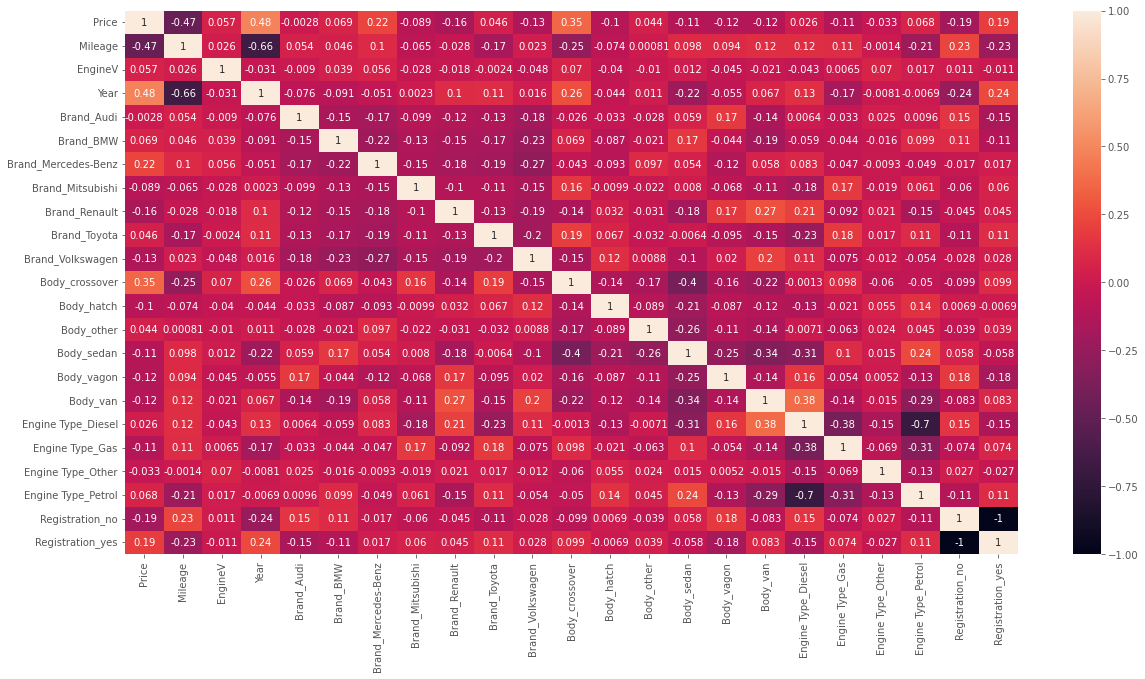

In [221]:
plt.figure(figsize =(20,10))
sns.heatmap(df.corr(),annot = True)

# Feature Engineering 

In [71]:
plt.style.use('ggplot')

In [72]:
df = pd.read_csv('Train.csv')

In [73]:
df = df.dropna()
df = df.drop_duplicates()

In [74]:
df['mileage_per_enguinev']=df['Mileage']/df['EngineV']

In [75]:
df = pd.get_dummies(data = df, columns = ['Brand','Body','Engine Type','Registration'])
df  =df.drop('Model',axis =1)
X = df[df.columns[df.columns != "Price"]]
y = df.Price

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [77]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [78]:
model.score(X_train,y_train),model.score(X_test,y_test)

(0.4527270068540734, 0.4299470111549982)

In [79]:
print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred), r2_score(y_test,y_pred),"\n")
print(mean_absolute_error(y_pred_train,y_train), mean_squared_error(y_pred_train,y_train),r2_score(y_pred_train,y_train))
print()

9560.954341503517 284835907.6958044 0.4299470111549982 

10496.536372971079 374325629.75269085 -0.20883663854921708



# EDA

In [80]:
df = pd.read_csv('Train.csv')

In [81]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [82]:
a = pd.DataFrame()
a['Count'] = df.groupby(df.Brand)['Price'].sum()
a['sum'] = df.groupby(df.Brand)['Price'].size()

a['average']=df.groupby(df.Brand)['Price'].sum()/df.groupby(df.Brand)['Price'].size()

In [83]:
a

,Count,sum,average
Brand,,,
Audi,8172418.00,457,17882.752735
BMW,15738471.25,694,22677.912464
Mercedes-Benz,26078057.00,921,28314.937025
Mitsubishi,3648515.30,327,11157.539144
Renault,3664017.92,469,7812.404947
Toyota,11815208.21,541,21839.571553
Volkswagen,11917743.28,936,12732.631709


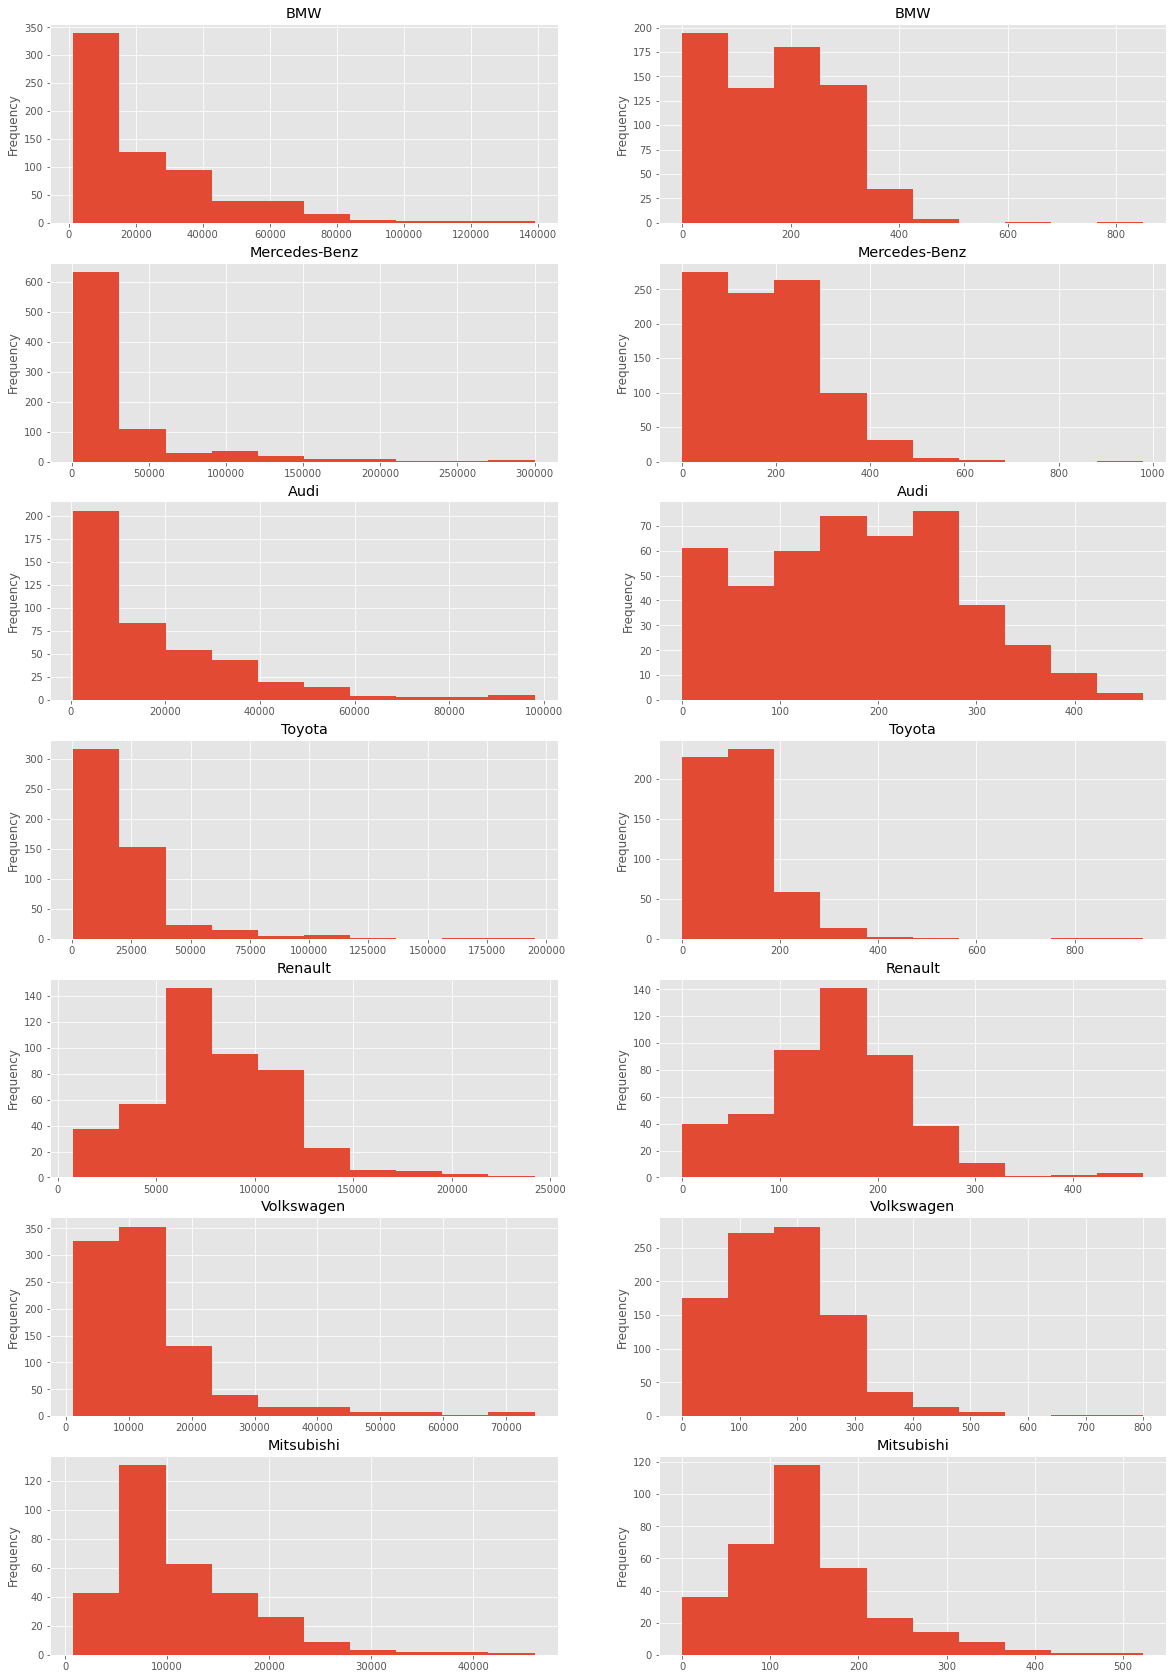

In [84]:
a = np.arange(1,14,2)
b = np.arange(2,15,2)

plt.subplots(7,2,figsize =(20,30))
for n,i in enumerate(df.Brand.unique()):
    plt.subplot(7,2,a[n])
    df[df.Brand ==i].Price.plot(kind ='hist')
    plt.title(i)
    plt.subplot(7,2,b[n])
    df[df.Brand ==i].Mileage.plot(kind ='hist',)
    plt.title(i)


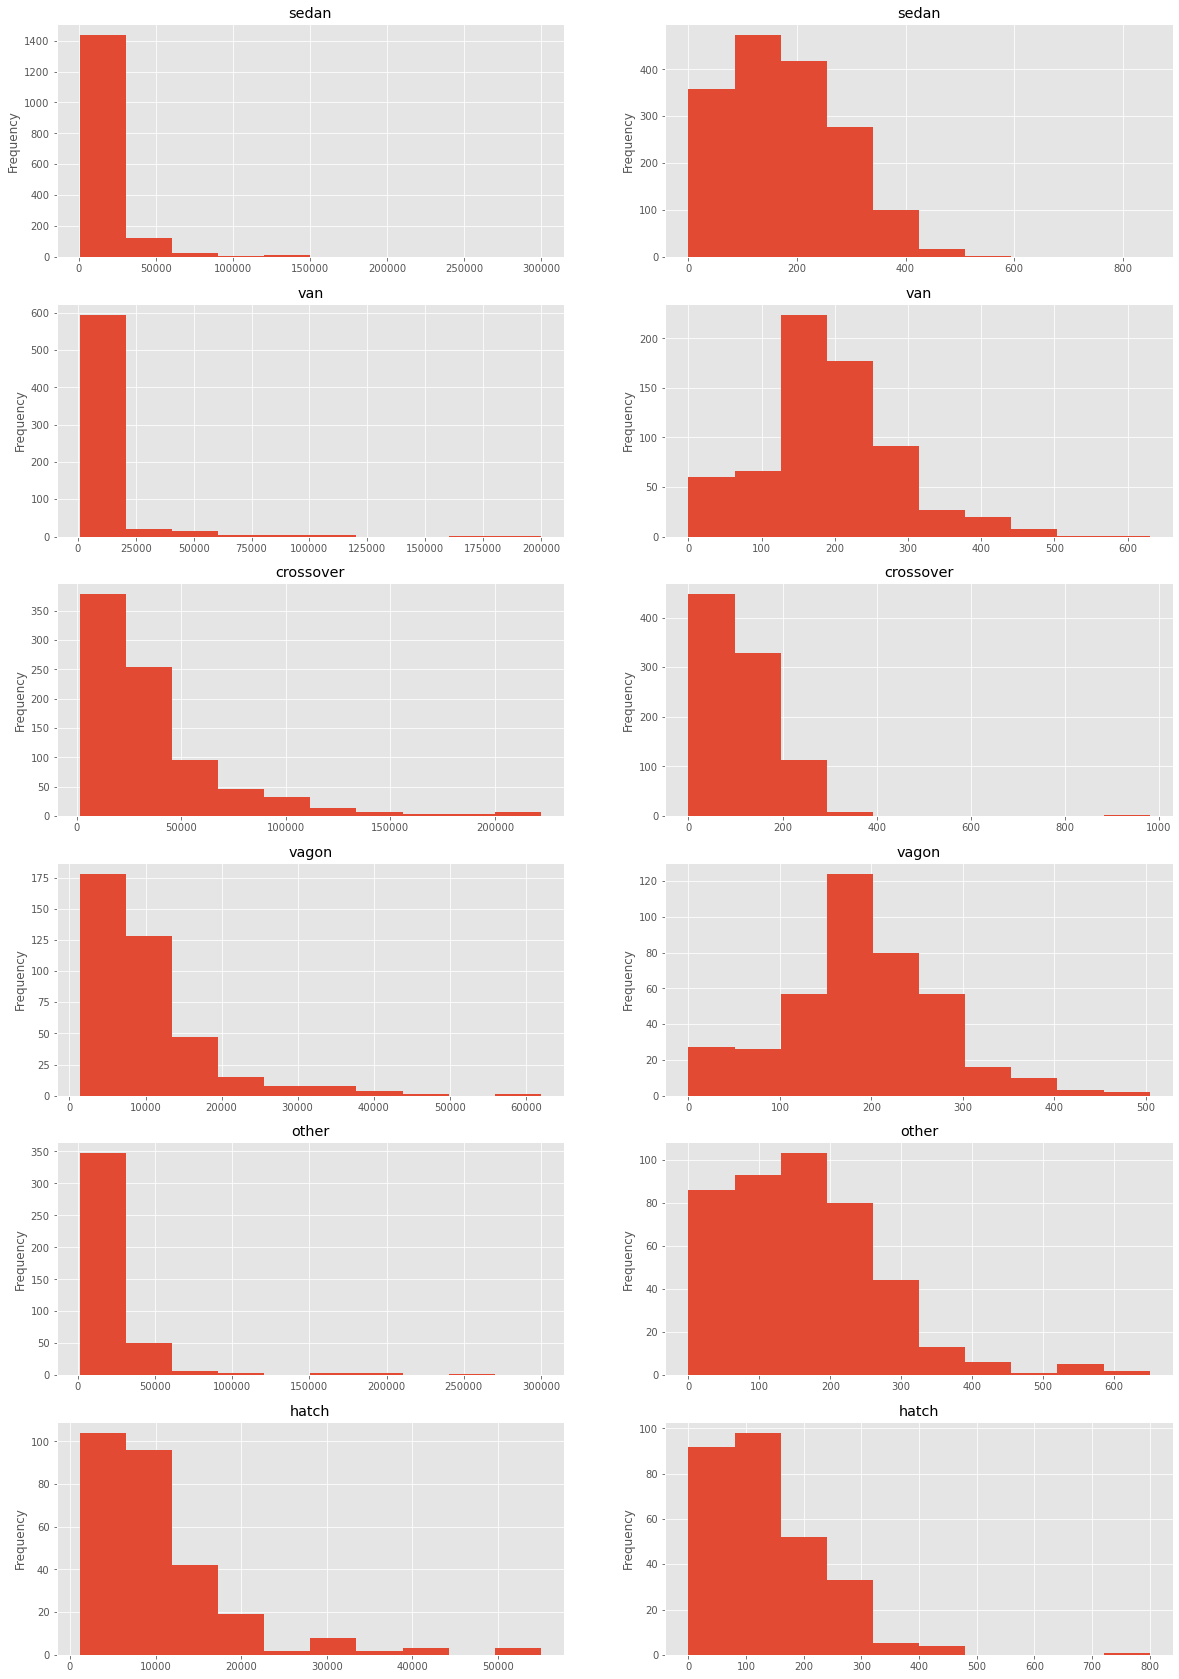

In [85]:
a = np.arange(1,12,2)
b = np.arange(2,13,2)

plt.subplots(6,2,figsize =(20,30))
for n,i in enumerate(df.Body.unique()):
    plt.subplot(6,2,a[n])
    df[df.Body ==i].Price.plot(kind ='hist')
    plt.title(i)
    plt.subplot(6,2,b[n])
    df[df.Body ==i].Mileage.plot(kind ='hist',)
    plt.title(i)


In [86]:
df.columns = ['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine_Type','Registration', 'Year', 'Model']

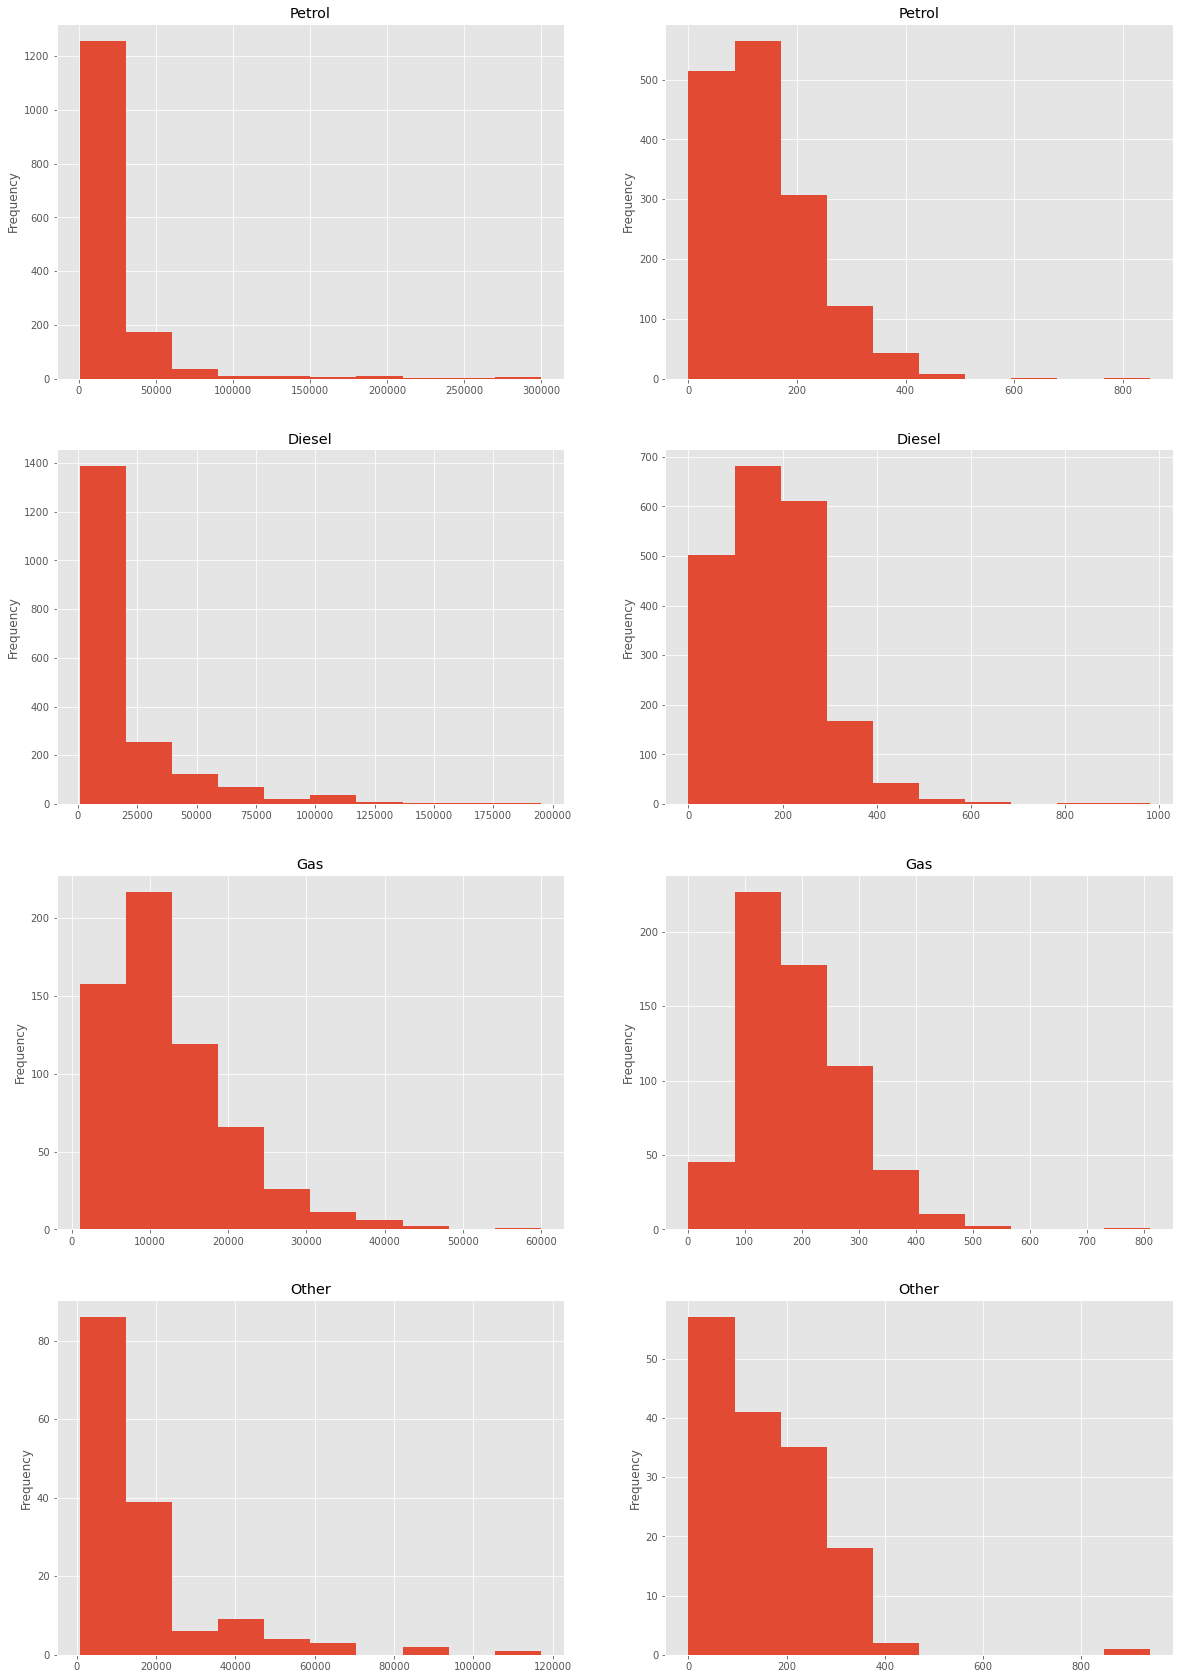

In [87]:
a = np.arange(1,12,2)
b = np.arange(2,13,2)

plt.subplots(4,2,figsize =(20,30))
for n,i in enumerate(df['Engine_Type'].unique()):
    plt.subplot(4,2,a[n])
    df[df.Engine_Type ==i].Price.plot(kind ='hist')
    plt.title(i)
    plt.subplot(4,2,b[n])
    df[df.Engine_Type ==i].Mileage.plot(kind ='hist',)
    plt.title(i)


In [88]:
df.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine_Type',
       'Registration', 'Year', 'Model'],
      dtype='object')

In [89]:
tmp = pd.DataFrame(df.groupby(['Engine_Type','Brand'])['Brand',].count())

In [90]:
tmp

Brand
Engine_Type Brand               
Diesel      Audi             214
            BMW              267
            Mercedes-Benz    509
            Mitsubishi        51
            Renault          355
            Toyota            94
            Volkswagen       529
Gas         Audi              53
            BMW               74
            Mercedes-Benz     98
            Mitsubishi       114
            Renault           24
            Toyota           163
            Volkswagen        87
Other       Audi              23
            BMW               21
            Mercedes-Benz     32
            Mitsubishi        12
            Renault           19
            Toyota            18
            Volkswagen        29
Petrol      Audi             167
            BMW              332
            Mercedes-Benz    282
            Mitsubishi       150
            Renault           71
            Toyota           266
            Volkswagen       291

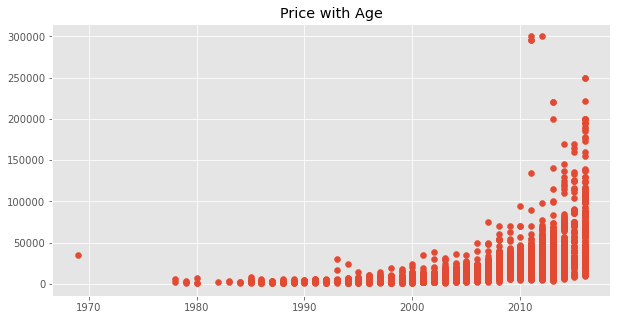

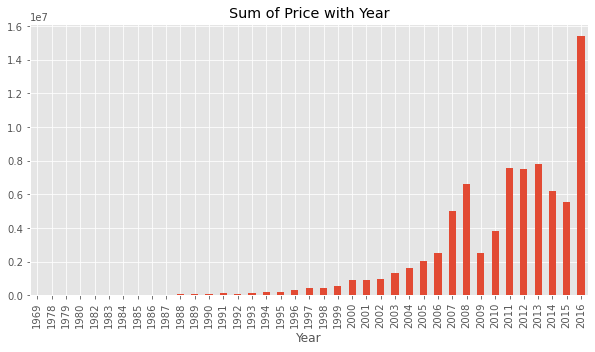

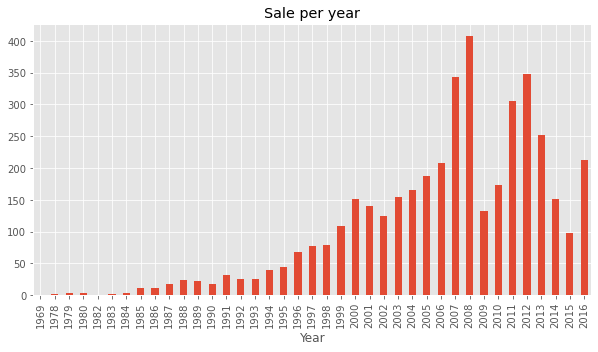

In [91]:
plt.figure(figsize = (10,5))
plt.scatter(df.Year,df.Price)
plt.title('Price with Age')
plt.show()
plt.figure(figsize = (10,5))
df.groupby('Year').Price.sum().plot(kind = 'bar')
plt.title('Sum of Price with Year')
plt.show()
plt.figure(figsize = (10,5))
df.groupby('Year').Price.count().plot(kind = 'bar')
plt.title('Sale per year')
plt.show()

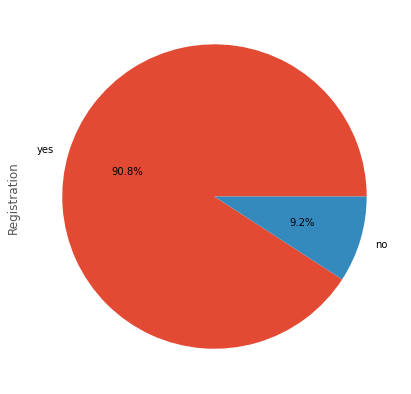

In [92]:

plt.figure(figsize = (12,7))
df.Registration.value_counts().plot(kind = 'pie',autopct = '%1.1f%%')
plt.show()

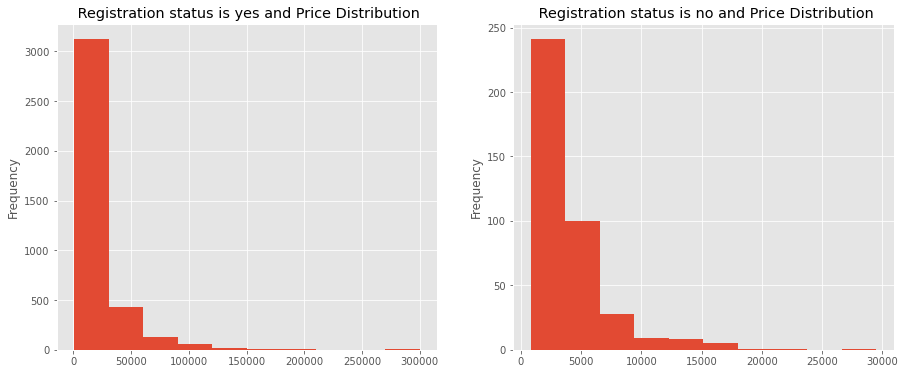

In [93]:
plt.subplots(1,2,figsize = (15,6))
n =1
for i in df.Registration.unique():
    plt.subplot(1,2,n)
    df[df.Registration == i].Price.plot(kind = 'hist')
    plt.title(" Registration status is {} and Price Distribution".format(i))
    n = n+1

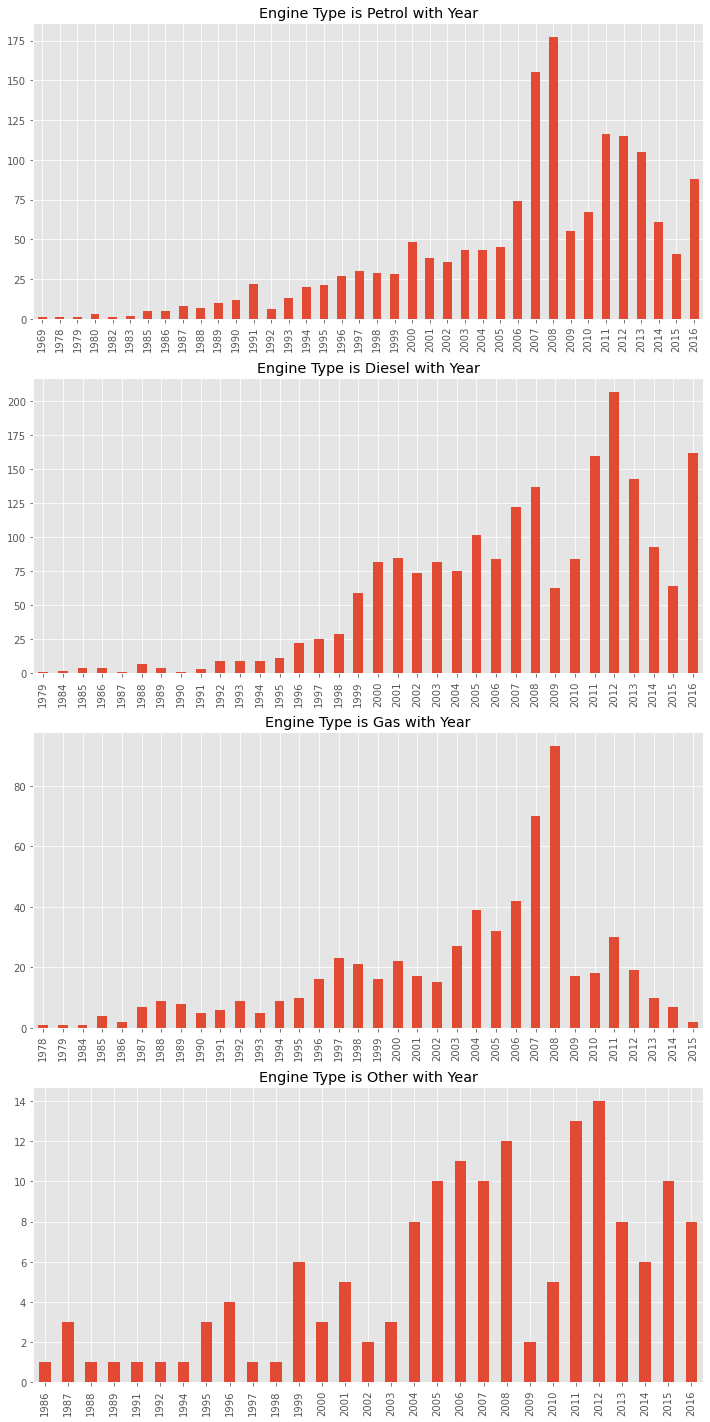

In [94]:

plt.subplots(4,1,figsize = (12,25))
for n, i in enumerate(df.Engine_Type.unique()):
    plt.subplot(4,1,n+1)
    df[df.Engine_Type ==i]['Year'].value_counts().sort_index().plot(kind = 'bar')
    plt.title("Engine Type is {} with Year".format(i))

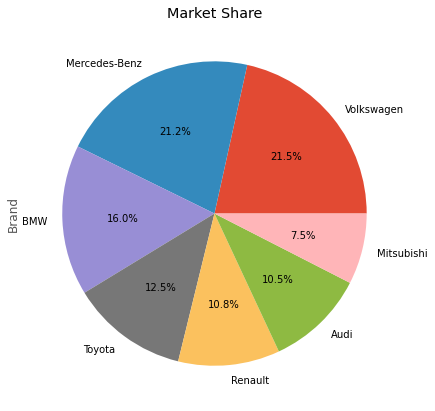

In [95]:
plt.figure(figsize = (12,7))
df.Brand.value_counts().plot(kind = 'pie',autopct = '%1.1f%%')
plt.title('Market Share')
plt.show()

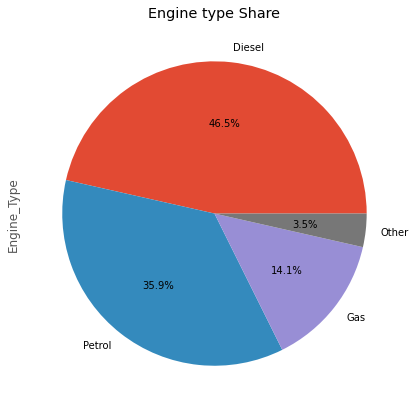

In [96]:
plt.figure(figsize = (12,7))
df.Engine_Type.value_counts().plot(kind = 'pie',autopct = '%1.1f%%')
plt.title('Engine type Share')
plt.show()

# Model Building 

In [ ]:
for i in df.Brand.unique():
    print('Model for {} ===>'.format(i))
    tmp = df[df.Brand == i]
    tmp = pd.get_dummies(data = tmp, columns = ['Body','Engine_Type','Registration'])
    tmp  =tmp.drop(['Model','Brand'],axis =1)
    X = tmp[tmp.columns[tmp.columns != "Price"]]
    y = tmp.Price
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    scale = StandardScaler()
    X_train = scale.fit_transform(X_train)
    X_test = scale.transform(X_test)
    model = RandomForestRegressor()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    model.score(X_train,y_train),model.score(X_test,y_test)
    print('MAE,MSE and Rsquare for Train Data')
    print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred), r2_score(y_test,y_pred))
    print('MAE,MSE and Rsquare for Test Data')
    print(mean_absolute_error(y_pred_train,y_train), mean_squared_error(y_pred_train,y_train),r2_score(y_pred_train,y_train))
    print("============="*5,"\n")



Model for BMW ===>
MAE,MSE and Rsquare for Train Data
3492.7412603172015 44088003.79964697 0.9034160573585079
MAE,MSE and Rsquare for Test Data
1377.959005969478 6182924.309693121 0.9880931485699886

Model for Mercedes-Benz ===>
MAE,MSE and Rsquare for Train Data
5448.632022622346 127623045.14191964 0.9289935000290555
MAE,MSE and Rsquare for Test Data
3043.168956432353 61811094.48003345 0.9611625384702946

Model for Audi ===>
MAE,MSE and Rsquare for Train Data
2850.105795477904 27860862.209654834 0.9285523499985501
MAE,MSE and Rsquare for Test Data
1145.1412539115647 5337134.458758345 0.9830147276106068

Model for Toyota ===>
MAE,MSE and Rsquare for Train Data
3966.8250449799193 116479036.98597786 0.8051035587624943
MAE,MSE and Rsquare for Test Data
1148.4126691889217 5285589.238864357 0.9810956028994832

Model for Renault ===>
MAE,MSE and Rsquare for Train Data
1408.7968452461937 3696003.2269965685 0.6918278068544355
MAE,MSE and Rsquare for Test Data
478.8188592623874 531407.268100031

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute

In [ ]:

for i in df.Brand.unique():
    print('Model for {} ===>'.format(i))
    tmp = df[df.Brand == i]
    tmp = pd.get_dummies(data = tmp, columns = ['Body','Engine_Type','Registration'])
    tmp  =tmp.drop(['Model','Brand'],axis =1)
    X = tmp[tmp.columns[tmp.columns != "Price"]]
    y = tmp.Price

    model = XGBRegressor()

    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

    scores = cross_val_score(model, X, y, scoring= 'r2', cv=cv, n_jobs=-1)

    scores = absolute(scores)
    print(scores)
    print("Mean value for score is {} \n".format(scores.mean()))
    

Model for BMW ===>
[0.88994075 0.87278339 0.91282633 0.93012338 0.93464746 0.89853928
 0.90781967 0.95188995 0.94999875 0.92876081 0.9078359  0.88339835
 0.87308213 0.9255094  0.92203524 0.90862435 0.96644342 0.94591874
 0.95437289 0.91309964 0.82848187 0.9402694  0.91945128 0.93590639
 0.89430782 0.94280847 0.93012567 0.89932099 0.87684151 0.91857778]
Mean value for score is 0.915458033802578 

Model for Mercedes-Benz ===>
[0.92118429 0.66217698 0.9175175  0.79444359 0.30616015 0.67273055
 0.93035752 0.88460157 0.88321794 0.86731808 0.5783116  0.95119287
 0.56086884 0.89591385 0.81835548 0.90506342 0.96389214 0.78817126
 0.86453633 0.64274648 0.96541696 0.37094624 0.6375409  0.68740579
 0.98662335 0.30772181 0.9337504  0.85554841 0.72735964 0.73851481]
Mean value for score is 0.7673196255432403 

Model for Audi ===>
[0.91679545 0.97089148 0.95058797 0.81598404 0.93753561 0.96498696
 0.94207155 0.93178696 0.92652933 0.76363264 0.96622899 0.97830286
 0.9626076  0.90658932 0.94890397 0.8

In [ ]:
model_dict = {}
for i in df.Brand.unique():
    print('Model for {} ===>'.format(i))
    tmp = df[df.Brand == i]
    tmp = pd.get_dummies(data = tmp, columns = ['Body','Engine_Type','Registration'])
    tmp  =tmp.drop(['Model','Brand'],axis =1)
    X = tmp[tmp.columns[tmp.columns != "Price"]]
    y = tmp.Price
    
    model = XGBRegressor()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    scale = StandardScaler()
    X_train = scale.fit_transform(X_train)
    X_test = scale.transform(X_test)
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    model_dict['model_'+i] = model
    model.score(X_train,y_train),model.score(X_test,y_test)
    print('MAE,MSE and Rsquare for Test Data')
    print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred), r2_score(y_test,y_pred))
    print('MAE,MSE and Rsquare for Train Data')
    print(mean_absolute_error(y_pred_train,y_train), mean_squared_error(y_pred_train,y_train),r2_score(y_pred_train,y_train))
    print("============="*5,"\n")
    

Model for BMW ===>
MAE,MSE and Rsquare for Test Data
3844.0268852562426 45390056.780357406 0.9005636394768408
MAE,MSE and Rsquare for Train Data
327.90620111402177 1452013.3252060378 0.9973191980125786

Model for Mercedes-Benz ===>
MAE,MSE and Rsquare for Test Data
5555.162584412773 149533930.5168021 0.9168027919950569
MAE,MSE and Rsquare for Train Data
758.4967084206238 6843254.109763046 0.9962413985901194

Model for Audi ===>
MAE,MSE and Rsquare for Test Data
3088.4266234473357 33552303.199359063 0.9139569623620765
MAE,MSE and Rsquare for Train Data
184.80289393833706 730233.7591853433 0.9978346750890964

Model for Toyota ===>
MAE,MSE and Rsquare for Test Data
3883.9346359069086 106578000.9722747 0.8216702881377331
MAE,MSE and Rsquare for Train Data
139.91231259128105 205762.73831820293 0.9993308344091748

Model for Renault ===>
MAE,MSE and Rsquare for Test Data
1497.1117169895304 4115139.5480726473 0.656880283446037
MAE,MSE and Rsquare for Train Data
115.45014135412269 134798.843840